In [134]:
import pandas as pd

In [135]:
usedcars_df = pd.read_csv(r'data/data.csv')

In [136]:
usedcars_df['registration_date'] = pd.to_datetime(usedcars_df['registration_date'], errors='coerce')
usedcars_df['price_in_euro'] = pd.to_numeric(usedcars_df['price_in_euro'], errors='coerce')
usedcars_df['power_kw'] = pd.to_numeric(usedcars_df['power_kw'], errors='coerce')
usedcars_df['power_ps'] = pd.to_numeric(usedcars_df['power_ps'], errors='coerce')
usedcars_df['mileage_in_km'] = pd.to_numeric(usedcars_df['mileage_in_km'], errors='coerce')
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                251079 non-null  int64         
 1   brand                     251079 non-null  object        
 2   model                     251079 non-null  object        
 3   color                     250913 non-null  object        
 4   registration_date         250882 non-null  datetime64[ns]
 5   year                      251079 non-null  object        
 6   price_in_euro             250880 non-null  float64       
 7   power_kw                  250786 non-null  float64       
 8   power_ps                  250869 non-null  float64       
 9   transmission_type         251079 non-null  object        
 10  fuel_type                 251079 non-null  object        
 11  fuel_consumption_l_100km  224206 non-null  object        
 12  fu

/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_32478/4041750494.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usedcars_df['registration_date'] = pd.to_datetime(usedcars_df['registration_date'], errors='coerce')


In [137]:
# Remove the first column as it seems to be useless

usedcars_df = usedcars_df.drop("Unnamed: 0", axis=1)

usedcars_df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1995,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,1995,24900.0,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,1995-02-01,1995,5900.0,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,1995,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,1996,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [138]:
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].fillna(0)

In [139]:
fuel_consumption_counts = usedcars_df.groupby(['fuel_type']).size()
print(fuel_consumption_counts.sort_values(ascending=False))


fuel_type
Petrol      143280
Diesel       86421
Hybrid       12607
Electric      5967
LPG           1255
             ...  
08/2007          1
07/2022          1
07/2015          1
07/2007          1
119890           1
Length: 136, dtype: int64


In [140]:

fuel_consumption_counts = usedcars_df.groupby(['mileage_in_km']).size()
print(fuel_consumption_counts.sort_values(ascending=False))

mileage_in_km
10.0         6982
50.0         1533
15.0         1216
20.0         1208
5.0          1107
             ... 
60440.0         1
60441.0         1
60443.0         1
60445.0         1
3800000.0       1
Length: 71766, dtype: int64


### I will keep only Petrol, Diesel and Hybrid cars since they are the most common types

In [141]:
fuel_types_to_keep = ["Petrol", "Diesel", "Hybrid"]

usedcars_df = usedcars_df[usedcars_df['fuel_type'].isin(fuel_types_to_keep)]

In [142]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242308 entries, 0 to 251077
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     242308 non-null  object        
 1   model                     242308 non-null  object        
 2   color                     242154 non-null  object        
 3   registration_date         242308 non-null  datetime64[ns]
 4   year                      242308 non-null  object        
 5   price_in_euro             242308 non-null  float64       
 6   power_kw                  242207 non-null  float64       
 7   power_ps                  242207 non-null  float64       
 8   transmission_type         242308 non-null  object        
 9   fuel_type                 242308 non-null  object        
 10  fuel_consumption_l_100km  242308 non-null  object        
 11  fuel_consumption_g_km     242308 non-null  object        
 12  mileage

In [143]:
all_years = usedcars_df["year"].unique()
all_years = list(all_years)
print(all_years)

['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [144]:
all_fuel_consumptions = usedcars_df["fuel_consumption_l_100km"].unique()
all_fuel_consumptions = list(all_fuel_consumptions)
print(all_fuel_consumptions)

['10,9 l/100 km', 0, '9,5 l/100 km', '7,2 l/100 km', '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km', '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km', '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km', '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km', '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km', '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km', '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km', '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km', '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km', '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km', '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km', '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km', '5,6 l/100 km', '16,8 l/100 km', '5,7 l/100 km', '3,5 l/100 km', '4,4 l/100 km', '4,7 l/100 km', '4 l/100 km',

In [145]:
# Create a mask for rows that contain 'l/100 km' in 'fuel_consumption_l_100km'
mask = usedcars_df['fuel_consumption_l_100km'].astype(str).str.contains('l/100 km')

# Filter the DataFrame to keep only rows that meet the condition
filtered_df = usedcars_df[mask]

# Calculate the percentage of rows with the correct format
pct_of_correct_format = len(filtered_df) / len(usedcars_df) * 100

print(f'Percentage of rows that have the correct format: {pct_of_correct_format:.2f}%')

Percentage of rows that have the correct format: 91.36%


In [146]:
usedcars_df = filtered_df

# Remove 'l/100 km' from the 'fuel_consumption_l_100km' column
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].replace('- (l/100 km)', 0)

# Convert the column to float
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].astype(float)

# Display the DataFrame to confirm changes
usedcars_df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1995,1300.0,148.0,201.0,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,1995,4900.0,110.0,150.0,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,1996,17950.0,132.0,179.0,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,1996-04-01,1996,7900.0,110.0,150.0,Manual,Petrol,9.5,225 g/km,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,1996-12-01,1996,3500.0,110.0,150.0,Manual,Petrol,8.8,210 g/km,230000.0,Quadrifoglio


In [147]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(column, df, bins=50, remove_outliers=False, log_transform=False):
    data = df[column]

    if remove_outliers:
        # Removing the top 1% as an example
        quantile_limit = data.quantile(0.99)
        data = data[data <= quantile_limit]

    if log_transform and data.min() > 0:
        # Apply log transformation if the data is suitable (no zero or negative values)
        data = np.log(data)

    data.plot(kind='hist', bins=bins)
    plt.title(f'Histogram of {column}' + (' (Log Transformed)' if log_transform else ''))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

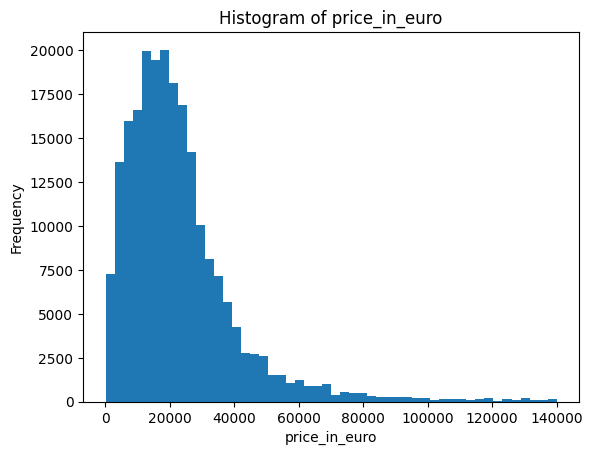

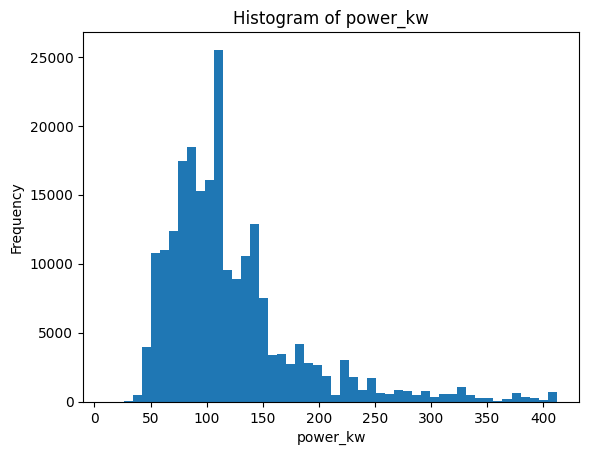

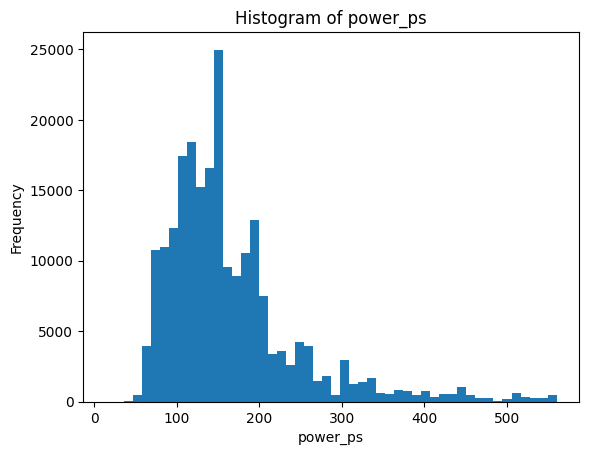

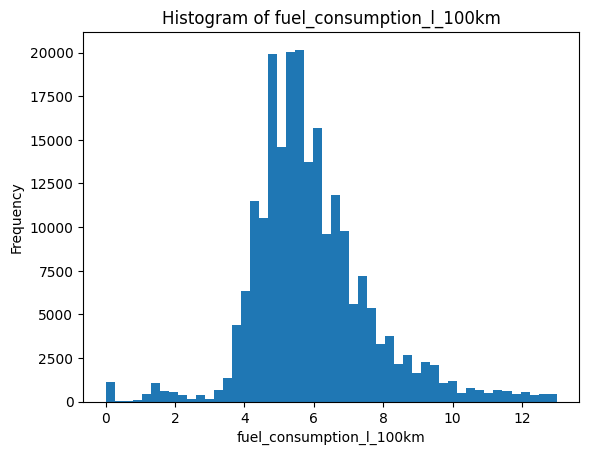

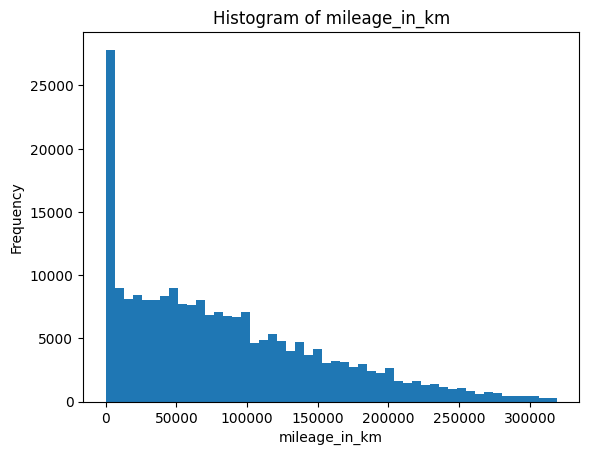

In [148]:
# Loop through each column in the DataFrame
for column in usedcars_df.columns:
    # Check if the column is of float type
    if usedcars_df[column].dtype == 'float64':
        plot_histogram(column, usedcars_df, remove_outliers=True, log_transform=False)


### Remove rows that have 0 kms for the column "mileage_in_km"

In [149]:
# Remove rows where mileage_in_km is 0
usedcars_df = usedcars_df[usedcars_df['mileage_in_km'] != 0]

In [150]:
numerical_columns = []

for column in usedcars_df.columns:
    # Check if the column is of float type
    if usedcars_df[column].dtype == 'float64':
        numerical_columns.append(column)
print(numerical_columns)

['price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'mileage_in_km']


In [151]:
correlation_matrix = usedcars_df[numerical_columns].corr()
correlation_matrix

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,mileage_in_km
price_in_euro,1.000000,0.607143,0.607213,0.256336,-0.281552
power_kw,0.607143,1.000000,0.999995,0.441546,-0.038660
power_ps,0.607213,0.999995,1.000000,0.441487,-0.038767
fuel_consumption_l_100km,0.256336,0.441546,0.441487,1.000000,0.087976
mileage_in_km,-0.281552,-0.038660,-0.038767,0.087976,1.000000


In [152]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221199 entries, 0 to 251076
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     221199 non-null  object        
 1   model                     221199 non-null  object        
 2   color                     221055 non-null  object        
 3   registration_date         221199 non-null  datetime64[ns]
 4   year                      221199 non-null  object        
 5   price_in_euro             221199 non-null  float64       
 6   power_kw                  221124 non-null  float64       
 7   power_ps                  221124 non-null  float64       
 8   transmission_type         221199 non-null  object        
 9   fuel_type                 221199 non-null  object        
 10  fuel_consumption_l_100km  221199 non-null  float64       
 11  fuel_consumption_g_km     221199 non-null  object        
 12  mileage

In [153]:
# For numerical columns
usedcars_df['power_kw'] = usedcars_df['power_kw'].fillna(usedcars_df['power_kw'].median())
usedcars_df['mileage_in_km'] = usedcars_df['mileage_in_km'].fillna(usedcars_df['mileage_in_km'].median())

# For categorical columns
usedcars_df['color'] = usedcars_df['color'].fillna('Unknown')

/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_32478/2590727564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['power_kw'] = usedcars_df['power_kw'].fillna(usedcars_df['power_kw'].median())
/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_32478/2590727564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['mileage_in_km'] = usedcars_df['mileage_in_km'].fillna(usedcars_df['mileage_in_km'].median())
/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_

In [154]:
nan_percentage = (usedcars_df.isna().sum() / len(usedcars_df)) * 100
print(nan_percentage)

brand                       0.000000
model                       0.000000
color                       0.000000
registration_date           0.000000
year                        0.000000
price_in_euro               0.000000
power_kw                    0.000000
power_ps                    0.033906
transmission_type           0.000000
fuel_type                   0.000000
fuel_consumption_l_100km    0.000000
fuel_consumption_g_km       0.000000
mileage_in_km               0.000000
offer_description           0.000000
dtype: float64


In [155]:
usedcars_df['power_ps'].fillna(usedcars_df['power_ps'].mean(), inplace=True)


/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_32478/2047706967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['power_ps'].fillna(usedcars_df['power_ps'].mean(), inplace=True)


In [157]:
nan_percentage = (usedcars_df.isna().sum() / len(usedcars_df)) * 100
print(nan_percentage)

brand                       0.0
model                       0.0
color                       0.0
registration_date           0.0
year                        0.0
price_in_euro               0.0
power_kw                    0.0
power_ps                    0.0
transmission_type           0.0
fuel_type                   0.0
fuel_consumption_l_100km    0.0
fuel_consumption_g_km       0.0
mileage_in_km               0.0
offer_description           0.0
dtype: float64


In [159]:
usedcars_df.to_parquet(r'data/transformed_data.parquet', engine='fastparquet')